# CS 515 Homework 3

## 1.1 Linear autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the input
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))


In [ ]:
def create_autoencoder(input_dim, k):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(k, activation=None)(input_layer)
    decoder = Dense(input_dim, activation=None)(encoder)

    autoencoder = Model(input_layer, decoder)

    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

    return autoencoder


Training autoencoder with k = 10
Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.0415 - val_loss: 0.0343
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0346 - val_loss: 0.0342
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0346 - val_loss: 0.0342
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0345 - val_loss: 0.0342
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0345 - val_loss: 0.0342
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0345 - val_loss: 0.0342
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0345 - val_loss: 0.0342
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0345 - val_loss: 0.0342
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0345 - val_loss: 0.0341
Epoch 10/10
938/938 [==============================] - 2s 2ms/step 

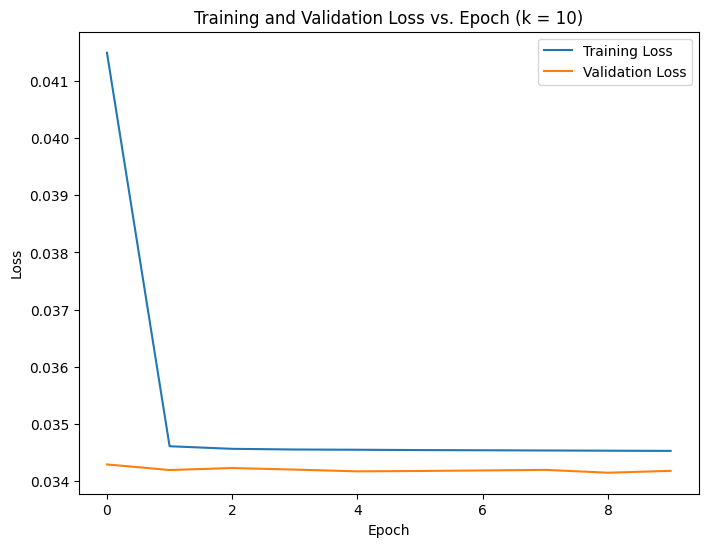

Training autoencoder with k = 50
Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0217 - val_loss: 0.0123
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 10/10
938/938 [==============================] - 5s 6ms/step 

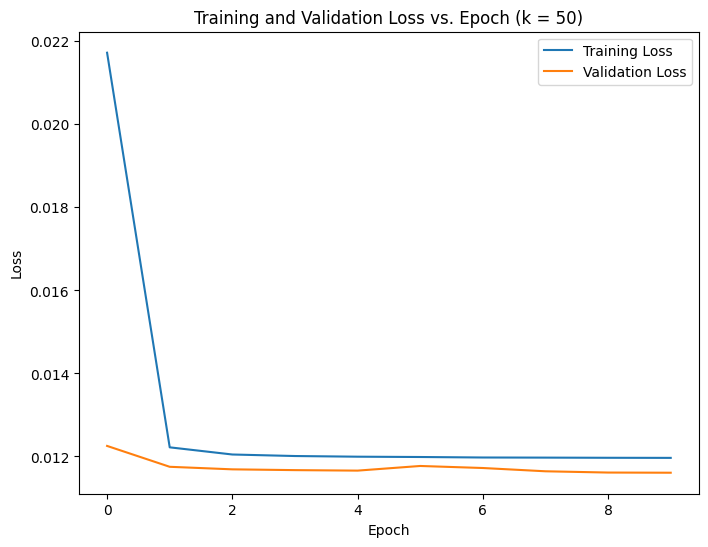

Training autoencoder with k = 100
Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0162 - val_loss: 0.0070
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 10/10
938/938 [==============================] - 5s 5ms/step

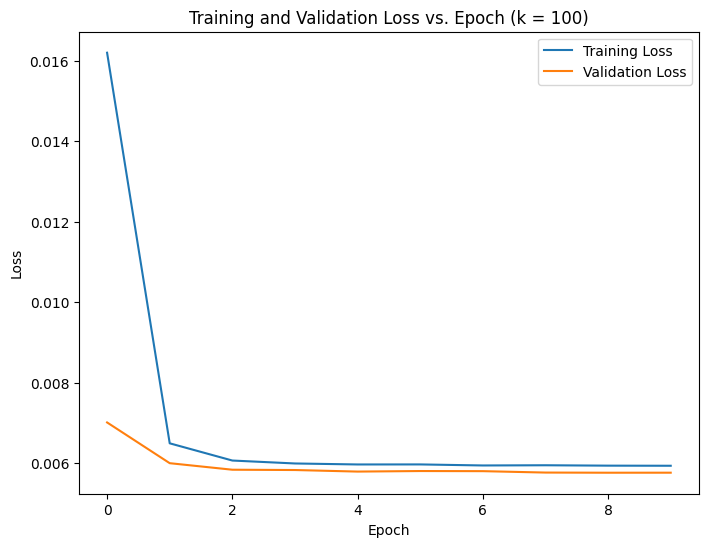

In [ ]:
input_dim = 784
k_values = [10, 50, 100]
epochs = 10
batch_size = 64

for k in k_values:
    autoencoder = create_autoencoder(input_dim, k)
    print(f"Training autoencoder with k = {k}")

    history = autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, x_test))

    # Plot the training loss and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss vs. Epoch (k = {k})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## 2. Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def select_images(x_data, y_data):
    selected_images = []
    selected_labels = []

    for digit in range(10):
        idx = np.where(y_data == digit)[0][0]
        selected_images.append(x_data[idx])
        selected_labels.append(y_data[idx])

    return np.array(selected_images), np.array(selected_labels)


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
selected_train_images, selected_train_labels = select_images(x_train, y_train)
selected_test_images, selected_test_labels = select_images(x_test, y_test)


In [ ]:
def visualize_reconstruction(autoencoder, original_images, title):
    # Flatten and encode-decode the images
    reshaped_images = original_images.reshape((-1, 28*28))
    reconstructed_images = autoencoder.predict(reshaped_images)
    reconstructed_images = reconstructed_images.reshape((-1, 28, 28))

    # Plot the original and reconstructed images side-by-side
    fig, axes = plt.subplots(2, 10, figsize=(20, 4))
    for i in range(10):
        axes[0, i].imshow(original_images[i], cmap='gray')
        axes[1, i].imshow(reconstructed_images[i], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].axis('off')

    axes[0, 0].set_title("Original Images")
    axes[1, 0].set_title("Reconstructed Images")
    plt.suptitle(title)
    plt.show()


1/1 [==============================] - 0s 49ms/step


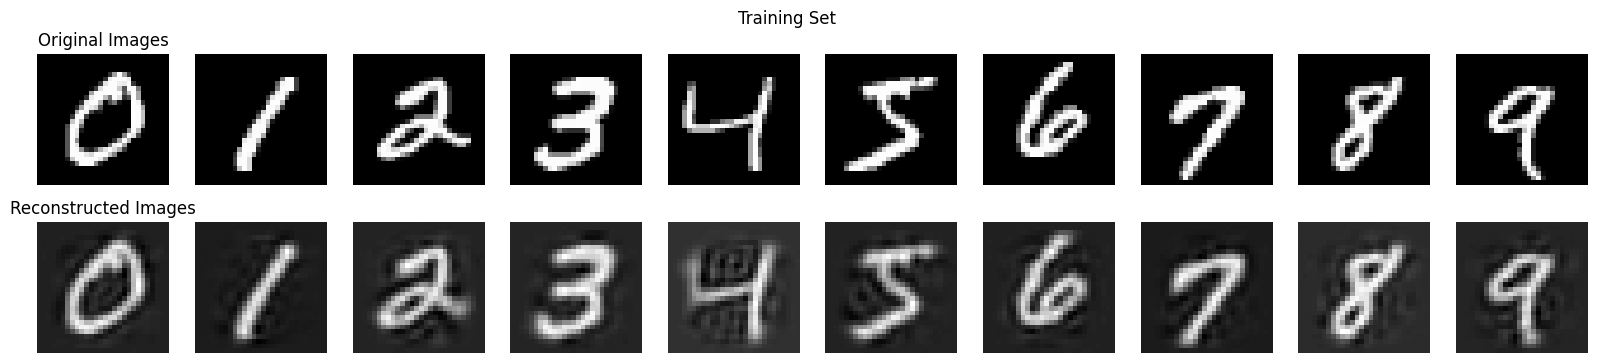

1/1 [==============================] - 0s 21ms/step


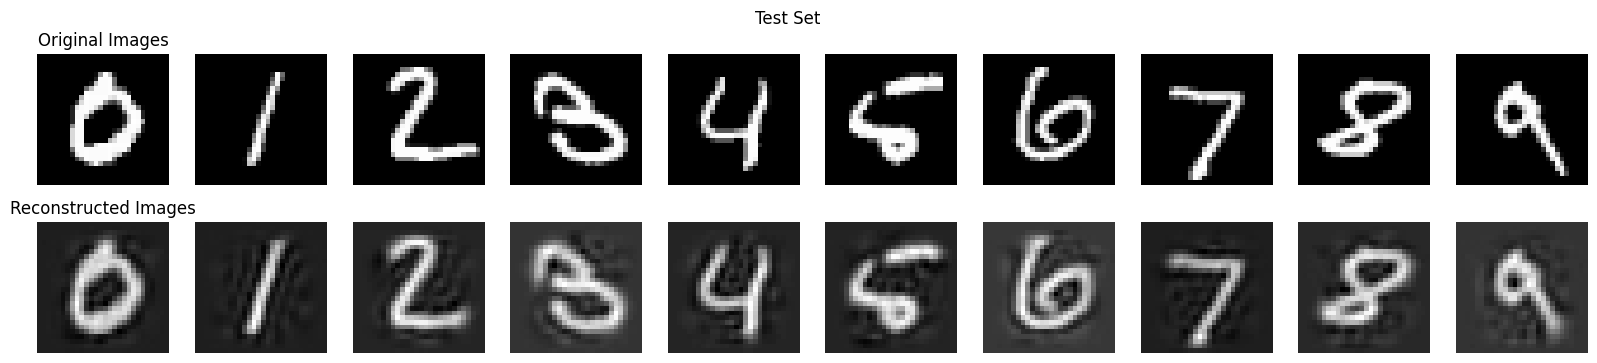

In [ ]:
visualize_reconstruction(autoencoder, selected_train_images, "Training Set")
visualize_reconstruction(autoencoder, selected_test_images, "Test Set")

## 3.Non-linear autoencoders

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Scale to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the input
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))


In [ ]:
def create_nonlinear_autoencoder(input_dim, k):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(k, activation='relu')(input_layer)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(input_layer, decoder)

    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

    return autoencoder


Training nonlinear autoencoder with k = 10
Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.0571 - val_loss: 0.0379
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0357 - val_loss: 0.0336
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0333 - val_loss: 0.0323
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0322 - val_loss: 0.0313
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0314 - val_loss: 0.0307
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0309 - val_loss: 0.0303
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0306 - val_loss: 0.0301
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0304 - val_loss: 0.0299
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0303 - val_loss: 0.0298
Epoch 10/10
938/938 [==============================] - 3s

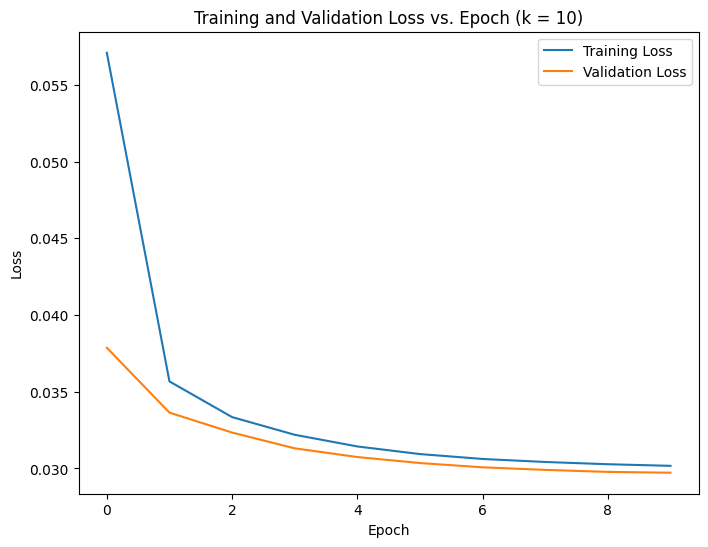

Training nonlinear autoencoder with k = 50
Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0358 - val_loss: 0.0176
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0133 - val_loss: 0.0097
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 9/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 10/10
938/938 [==============================] - 4s

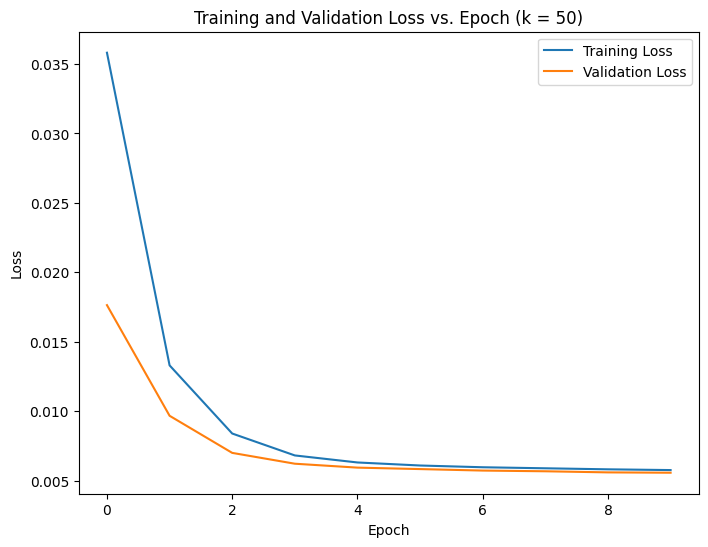

Training nonlinear autoencoder with k = 100
Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0273 - val_loss: 0.0107
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0077 - val_loss: 0.0054
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 10/10
938/938 [==============================] - 5

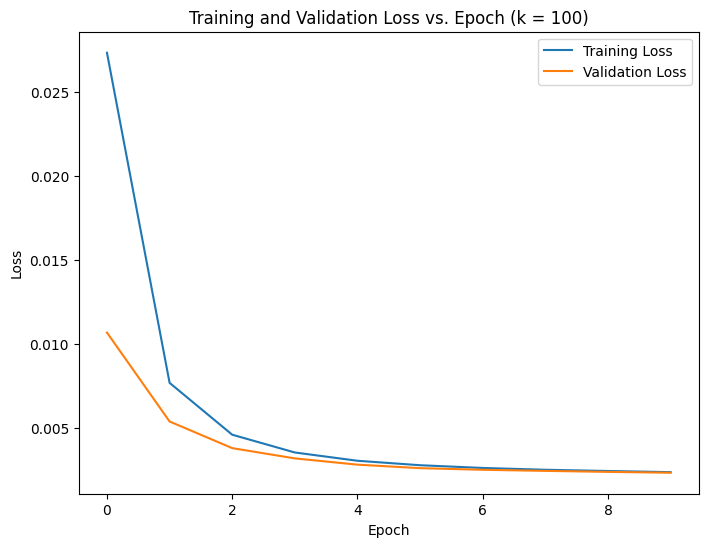

In [ ]:
input_dim = 784
k_values = [10, 50, 100]
epochs = 10
batch_size = 64

for k in k_values:
    autoencoder = create_nonlinear_autoencoder(input_dim, k)
    print(f"Training nonlinear autoencoder with k = {k}")

    history = autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, x_test))

    # Plot the training loss and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss vs. Epoch (k = {k})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Now, you can compare the results of the linear and nonlinear autoencoders by visualizing the reconstructed images and training losses. In general, the results should improve with the nonlinear autoencoder compared to the linear autoencoder because the added non-linear activation functions allow the autoencoder to learn more complex representations of the input data. The ReLU activation in the encoding layer introduces non-linearity, allowing the network to capture more complex relationships between input features. The sigmoid activation in the decoding layer ensures that the output values are in the range [0, 1], which matches the range of the input data.

However, the improvement in results may vary depending on the specific dataset and problem. It's important to analyze the reconstructed images and training losses to determine if the nonlinear autoencoder performs better than the linear autoencoder in your specific case. Use the visualization code provided in a previous response to visualize the reconstructed images and compare the results.

## 4.Advanced Stacked autoencoders

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt


In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [ ]:
def create_stacked_dense_autoencoder(input_shape):
    input_layer = Input(shape=input_shape)

    # Encoder
    encoded_1 = Dense(20, activation='relu')(input_layer)
    encoded_2 = Dense(10, activation='relu')(encoded_1)

    # Decoder
    decoded_1 = Dense(20, activation='relu')(encoded_2)
    decoded_2 = Dense(input_shape[0], activation='sigmoid')(decoded_1)

    autoencoder = Model(input_layer, decoded_2)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

    return autoencoder


In [ ]:
input_shape = (784,)
epochs = 10
batch_size = 64

stacked_dense_autoencoder = create_stacked_dense_autoencoder(input_shape)
history = stacked_dense_autoencoder.fit(x_train, x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_data=(x_test, x_test))


Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0602 - val_loss: 0.0409
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0371 - val_loss: 0.0340
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0327 - val_loss: 0.0306
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0304 - val_loss: 0.0293
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0295 - val_loss: 0.0287
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0290 - val_loss: 0.0284
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0286 - val_loss: 0.0280
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0283 - val_loss: 0.0278
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0281 - val_loss: 0.0276
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0279 - val_loss: 0.0274

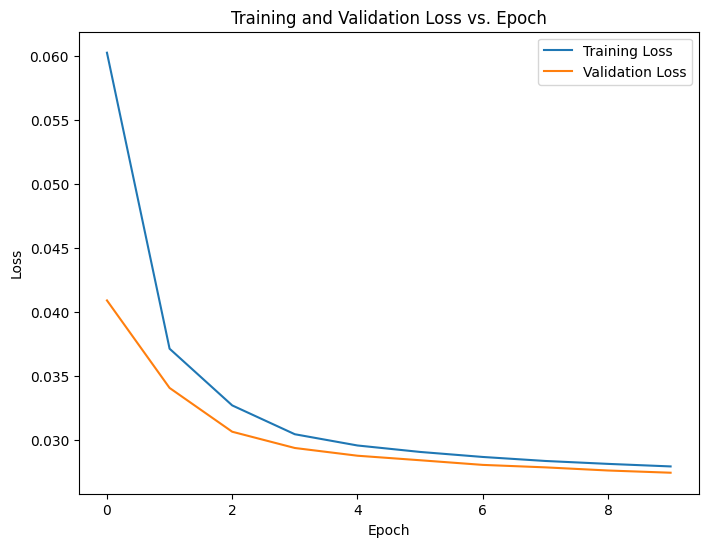

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
